In [17]:
import vanna
from vanna.remote import VannaDefault
import psycopg2
from dotenv import load_dotenv
import os

# Setup

In [18]:
load_dotenv('.env', override=True)
VANNA_KEY = os.getenv('VANNA_KEY')
VANNA_MODEL_NAME = os.getenv('VANNA_MODEL_NAME')
DB_SERVER = os.getenv('DB_SERVER')
DB_NAME = os.getenv('DB_NAME')
DB_USER = os.getenv('DB_USER')
DB_PASSWORD = os.getenv('DB_PASSWORD')
DB_PORT = os.getenv('DB_PORT')

# Set Model

In [19]:
vanna_model_name = VANNA_MODEL_NAME
vn = VannaDefault(model=vanna_model_name, api_key=VANNA_KEY)

# Connect to the Database

In [20]:
vn.connect_to_postgres(DB_SERVER,DB_NAME,DB_USER,DB_PASSWORD,DB_PORT)

# Questions


--------------------------------

[QUESTION]: What it the total amount of people by region? 

[QUERY]:
SELECT cr.name AS region, COUNT(p.businessentityid) AS total_people
FROM person.countryregion cr
JOIN person.stateprovince sp ON cr.countryregioncode = sp.countryregioncode
JOIN person.person p ON sp.stateprovinceid = p.businessentityid
GROUP BY cr.name;


,region,total_people
0,American Samoa,1
1,France,96
2,United States,53
3,Australia,5
4,United Kingdom,1
5,Palau,1
6,Germany,7
7,Canada,13
8,Marshall Islands,1
9,Micronesia,1


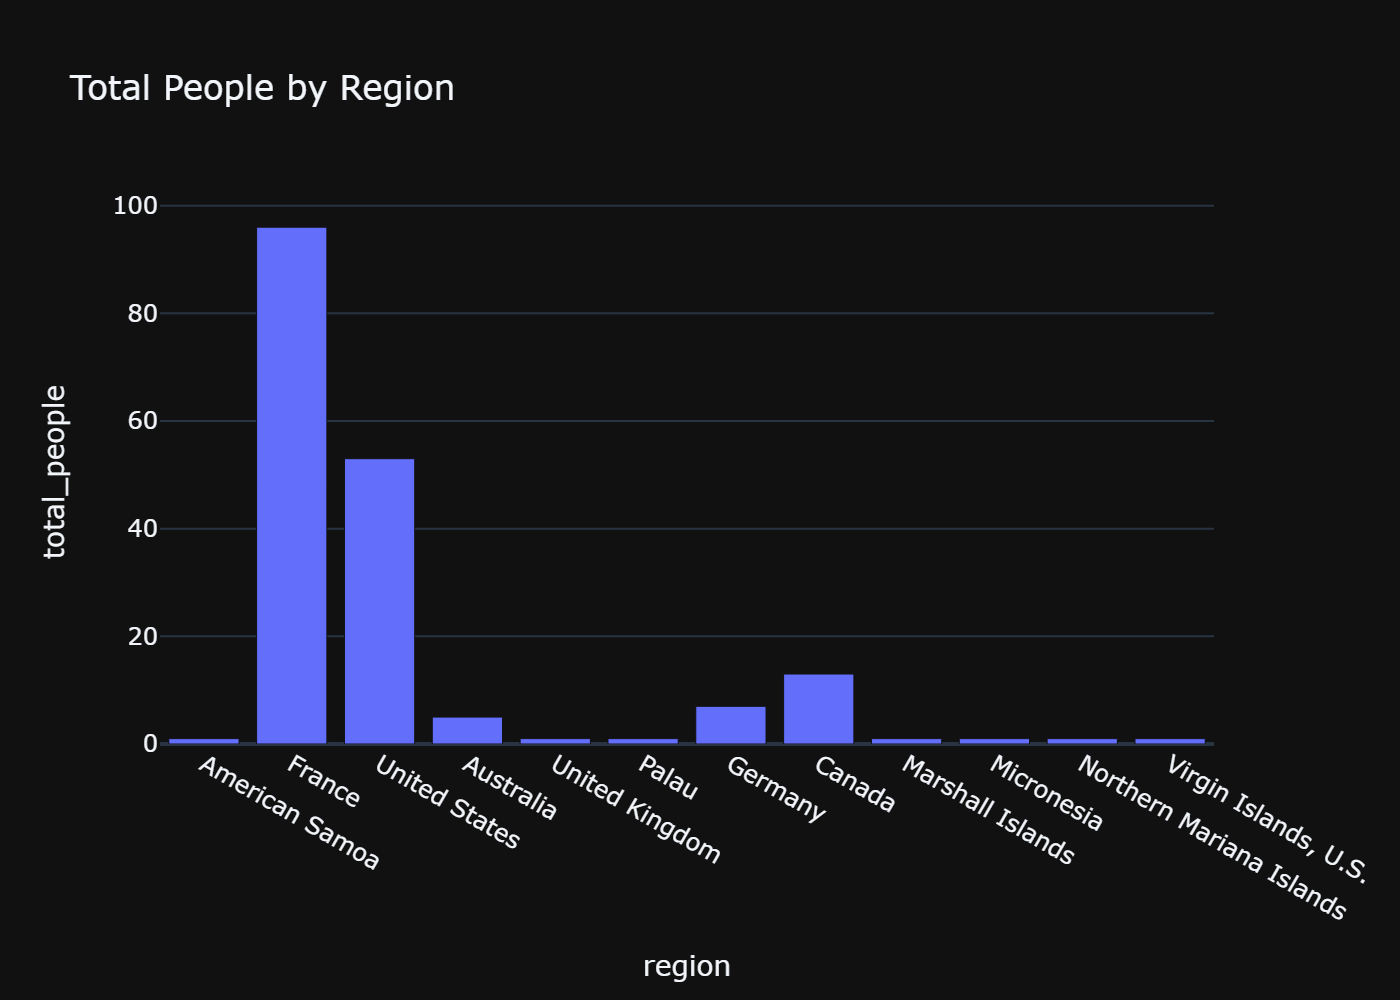


--------------------------------

[QUESTION]: Group the amount of people each business entity have 

[QUERY]:
SELECT businessentityid, COUNT(*) AS total_people
FROM person.person
GROUP BY businessentityid;


,businessentityid,total_people
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
...,...,...
19967,20773,1
19968,20774,1
19969,20775,1
19970,20776,1


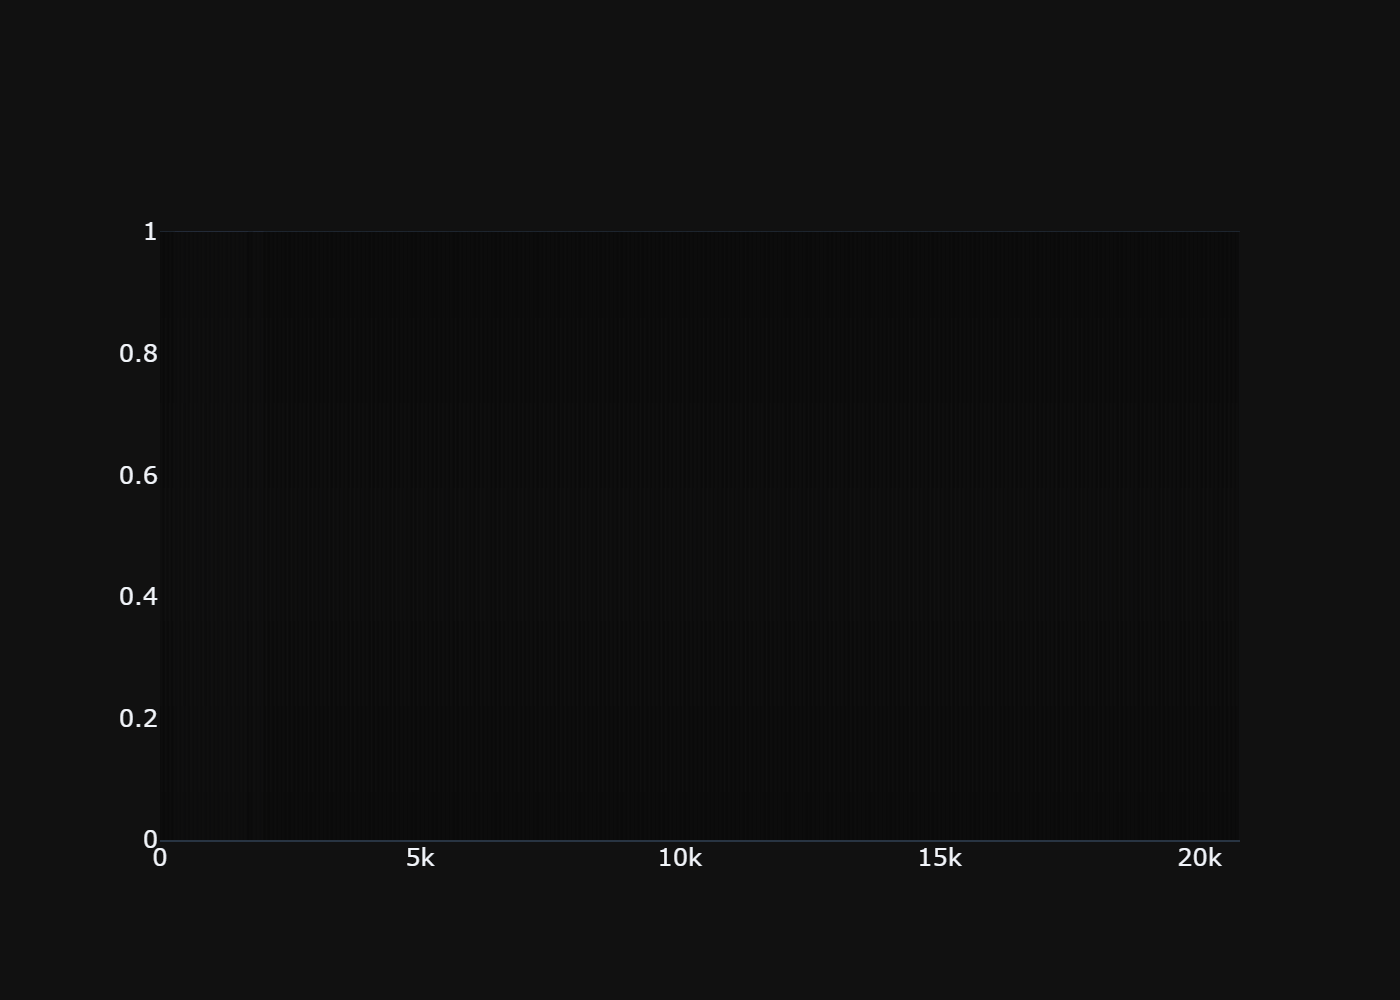


--------------------------------

[QUESTION]: How much work orders are? 

[QUERY]:
SELECT COUNT(*) AS total_work_orders
FROM production.workorder;


,total_work_orders
0,72591


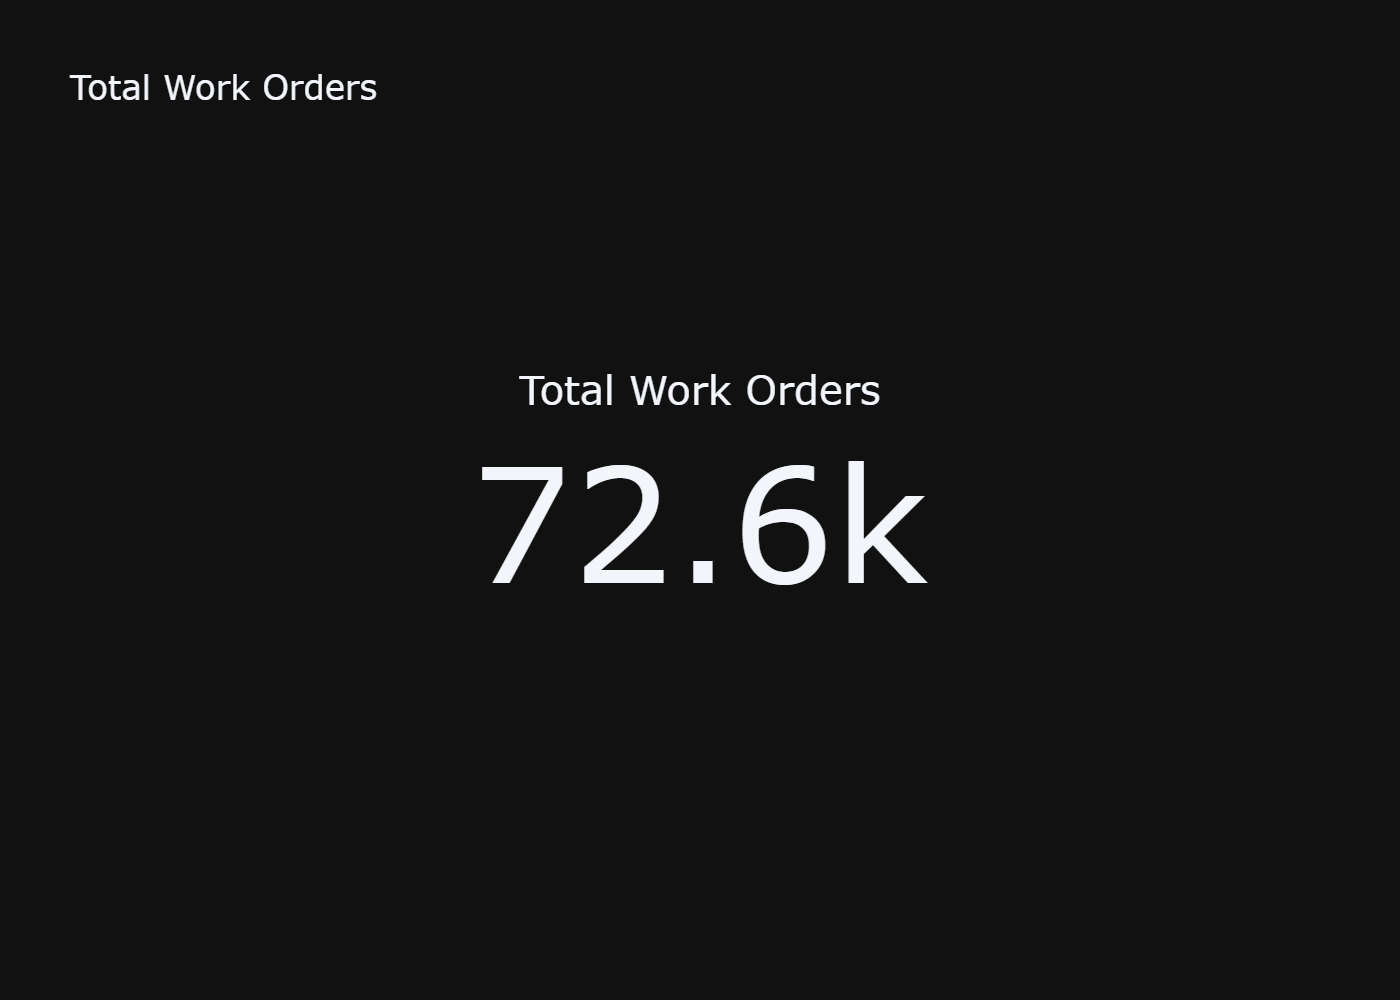


--------------------------------

[QUESTION]: Which is the product most ordered?Give me the total amount of products by category 

[QUERY]:
SELECT p.name AS product_name, COUNT(*) AS total_orders
FROM sales.salesorderdetail sod
JOIN production.product p ON sod.productid = p.productid
GROUP BY p.name
ORDER BY total_orders DESC
LIMIT 1;


,product_name,total_orders
0,Water Bottle - 30 oz.,4688


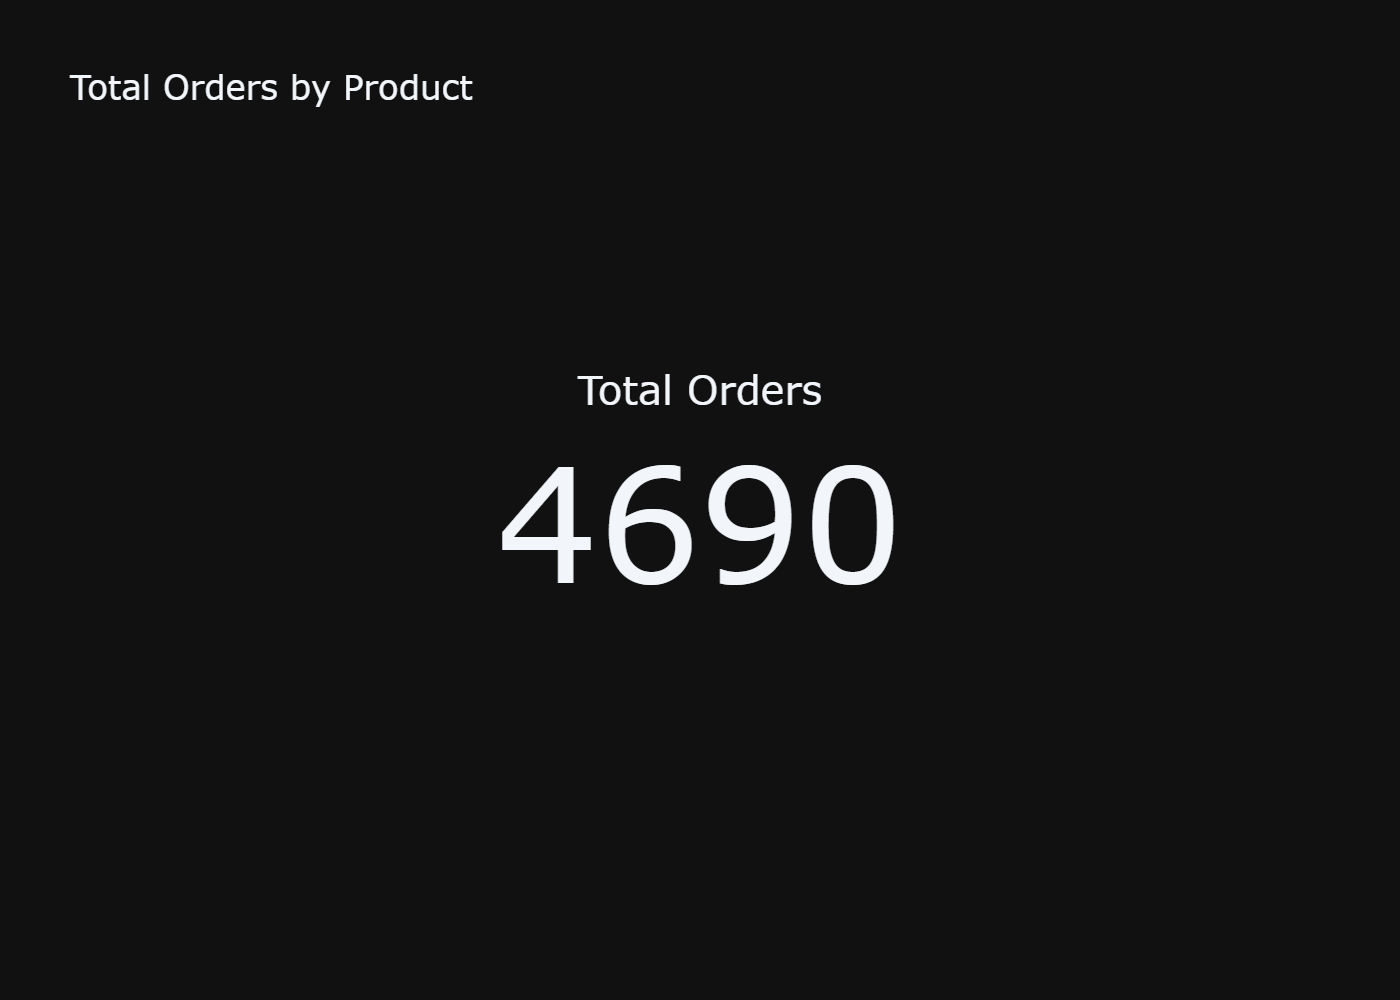


--------------------------------

[QUESTION]: What is the total amount from sales? 

[QUERY]:
SELECT SUM(salesytd) AS total_sales_amount
FROM sales.salesperson;


,total_sales_amount
0,36277591.9034


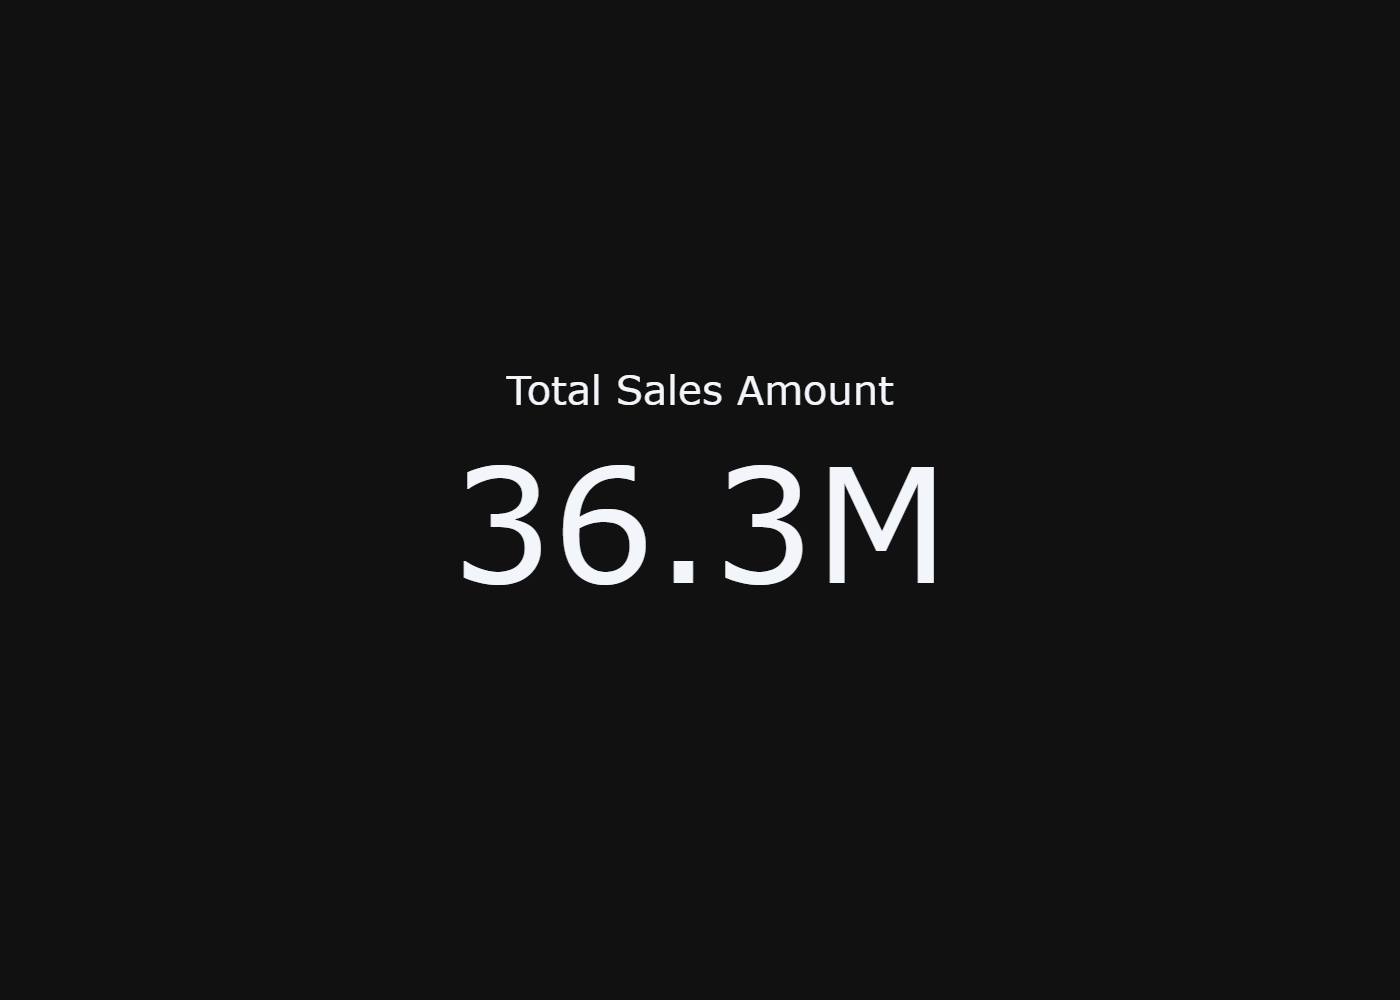


--------------------------------

[QUESTION]: What is the total profit? 

[QUERY]:
SELECT SUM(sod.orderqty * (sod.unitprice - sod.unitprice)) AS total_profit
FROM sales.salesorderdetail sod;


,total_profit
0,0.0000


<string>:6: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead



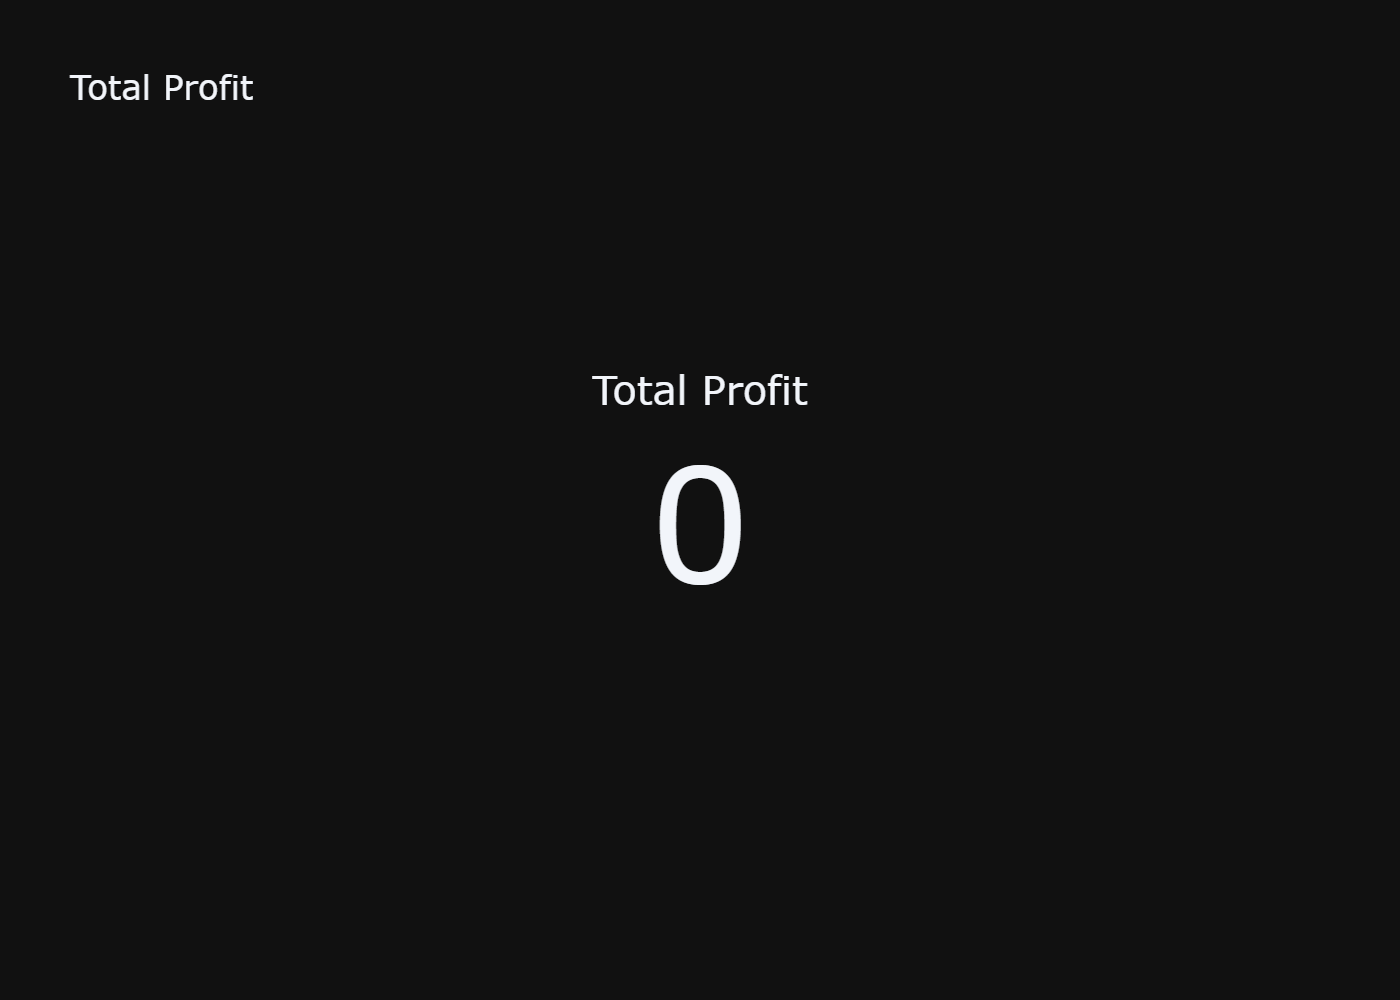


--------------------------------

[QUESTION]: Which is the product that most changed his cost over the past? 

[QUERY]:
SELECT p.name AS product_name, MAX(pch.standardcost - pch.standardcost) AS cost_change
FROM production.productcosthistory pch
JOIN production.product p ON pch.productid = p.productid
WHERE pch.startdate < CURRENT_DATE
AND (pch.enddate IS NULL OR pch.enddate > CURRENT_DATE)
GROUP BY p.name
ORDER BY cost_change DESC
LIMIT 1;


,product_name,cost_change
0,"HL Road Frame - Black, 48",0.0000


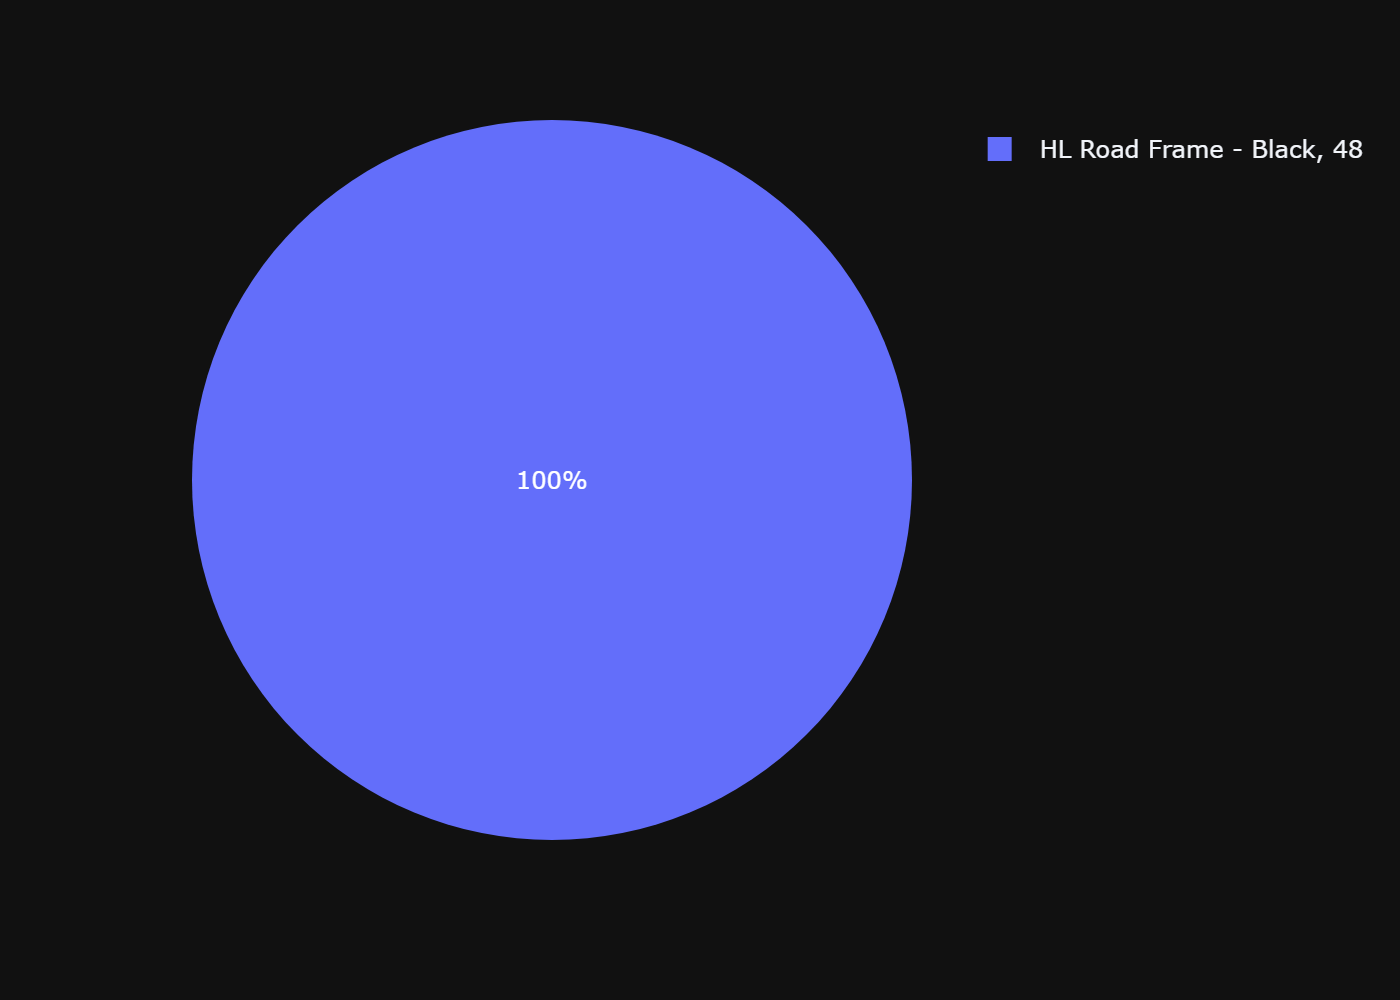


--------------------------------

[QUESTION]: How much product were sold for each category?What is the total cost amount of all the products? 

[QUERY]:
SELECT pc.name AS category, SUM(sod.orderqty) AS total_sold
FROM sales.salesorderdetail sod
JOIN production.product p ON sod.productid = p.productid
JOIN production.productsubcategory psc ON p.productsubcategoryid = psc.productsubcategoryid
JOIN production.productcategory pc ON psc.productcategoryid = pc.productcategoryid
GROUP BY pc.name;


,category,total_sold
0,Accessories,61932
1,Bikes,90268
2,Clothing,73670
3,Components,49044


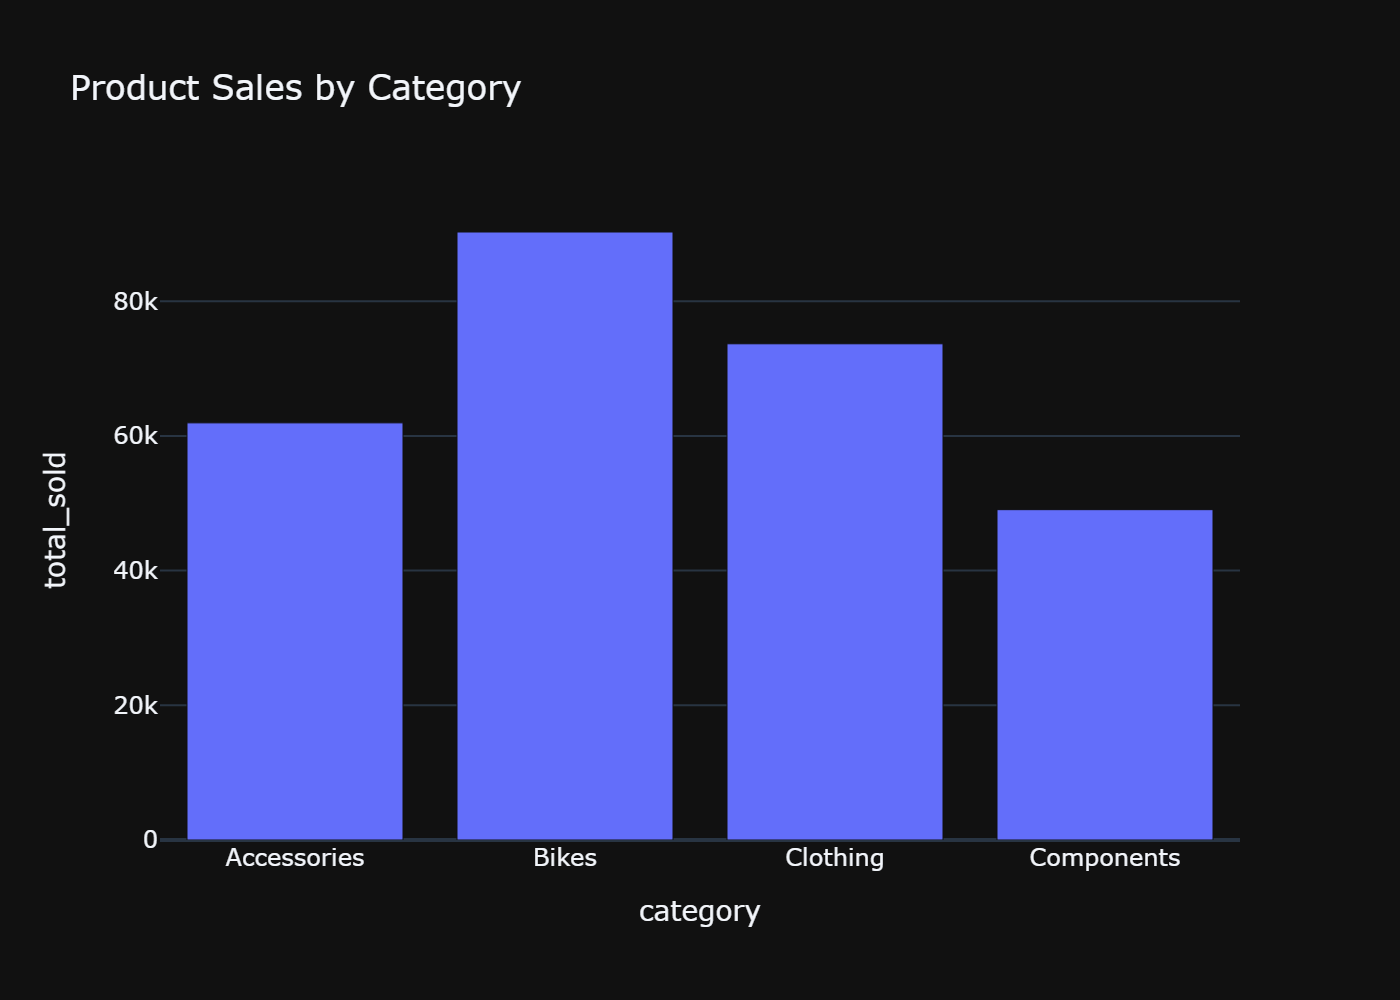


--------------------------------

[QUESTION]: What is the average sales per customers? 

[QUERY]:
SELECT AVG(salesytd) AS average_sales_per_customer
FROM sales.salesperson;


,average_sales_per_customer
0,2133975.994317647059


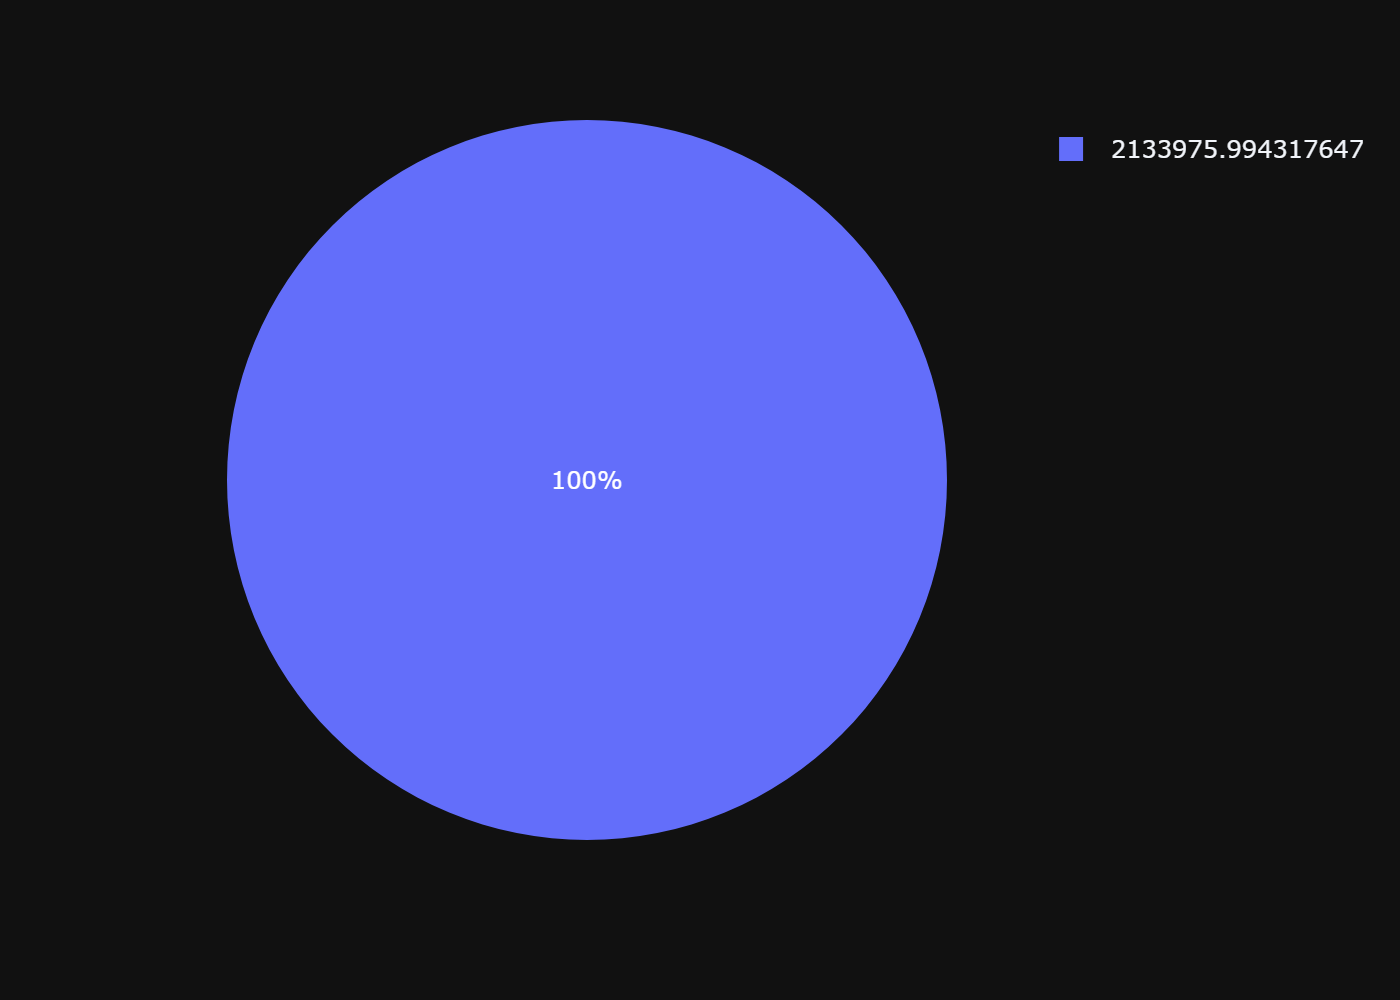


--------------------------------

[QUESTION]: What is the number of products in each category? 

[QUERY]:
SELECT pc.name AS category, COUNT(*) AS total_products
FROM production.product p
JOIN production.productsubcategory psc ON p.productsubcategoryid = psc.productsubcategoryid
JOIN production.productcategory pc ON psc.productcategoryid = pc.productcategoryid
GROUP BY pc.name;


,category,total_products
0,Bikes,97
1,Accessories,29
2,Clothing,35
3,Components,134


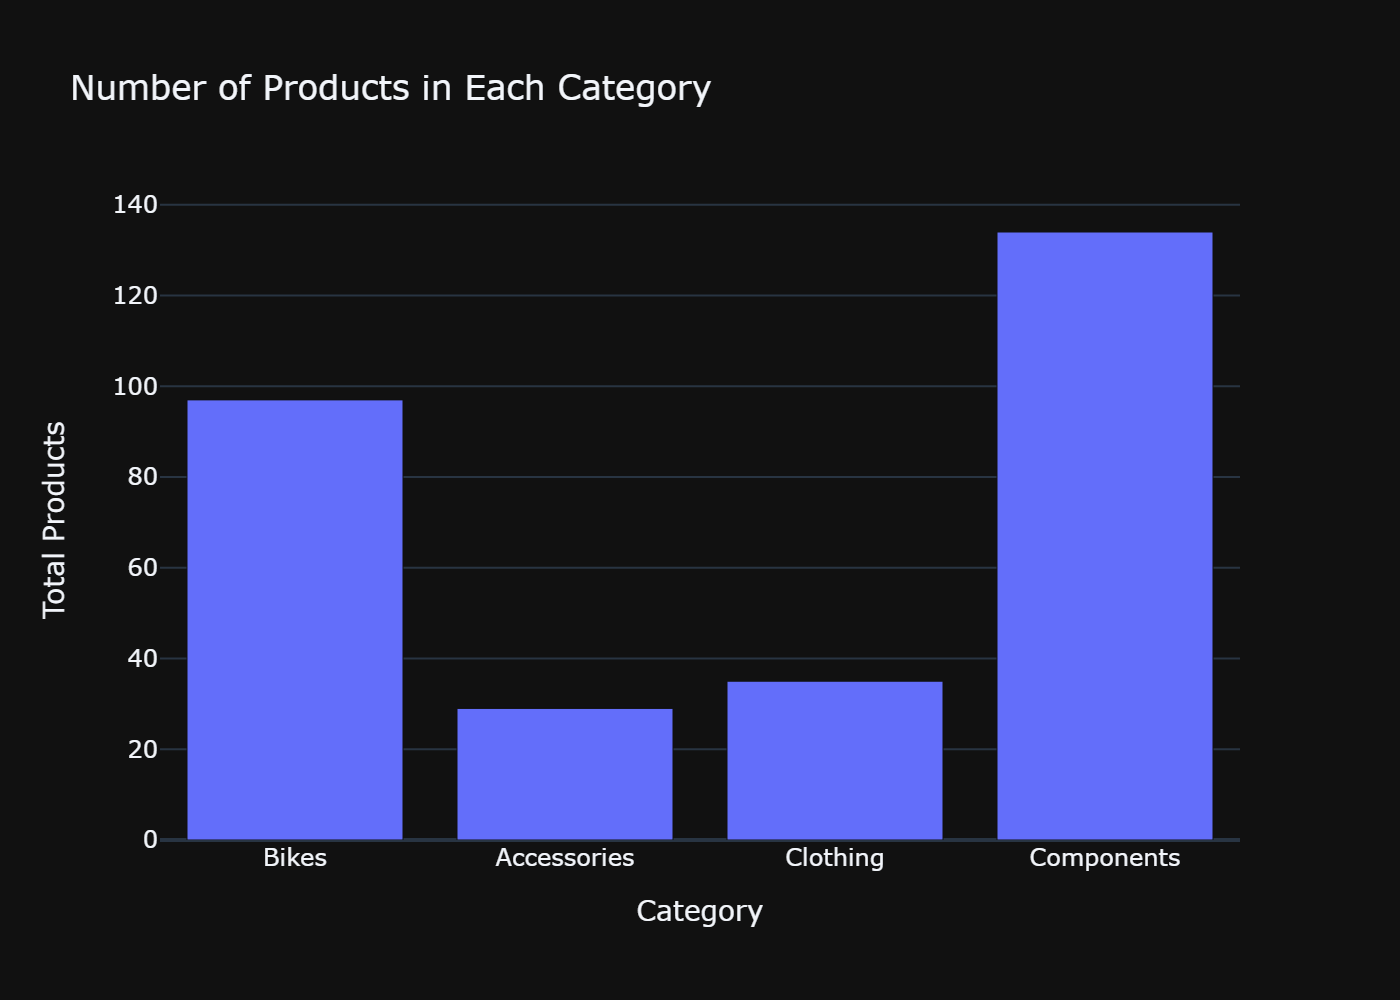


--------------------------------

[QUESTION]: Top 10 Customers with the highest purchase 

[QUERY]:
SELECT c.customerid, c.personid, c.storeid, c.territoryid, SUM(po.subtotal) AS total_purchase
FROM sales.customer c
JOIN purchasing.purchaseorderheader po ON c.customerid = po.vendorid
GROUP BY c.customerid, c.personid, c.storeid, c.territoryid
ORDER BY total_purchase DESC
LIMIT 10;


,customerid,personid,storeid,territoryid,total_purchase


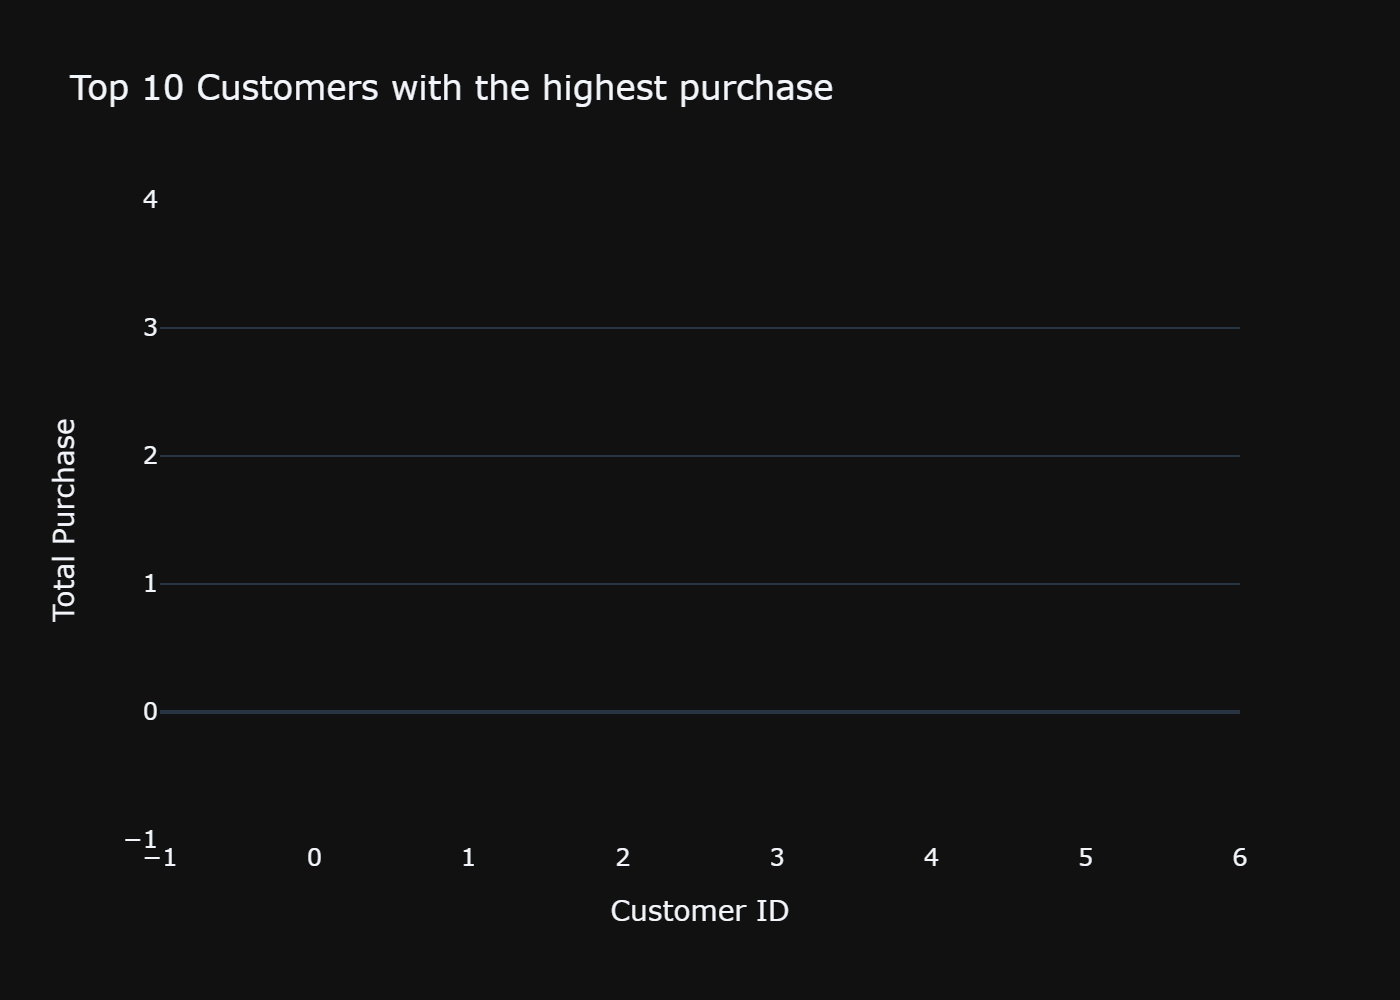


--------------------------------

[QUESTION]: Top 10 Employees with the highest sale 

[QUERY]:
SELECT p.firstname || ' ' || p.lastname AS employee_name, SUM(s.salesytd) AS total_sales
FROM sales.salesperson s
JOIN person.person p ON s.businessentityid = p.businessentityid
GROUP BY p.firstname, p.lastname
ORDER BY total_sales DESC
LIMIT 10;


,employee_name,total_sales
0,Linda Mitchell,4251368.5497
1,Jae Pak,4116871.2277
2,Michael Blythe,3763178.1787
3,Jillian Carson,3189418.3662
4,Ranjit Varkey Chudukatil,3121616.3202
5,José Saraiva,2604540.7172
6,Shu Ito,2458535.6169
7,Tsvi Reiter,2315185.611
8,Rachel Valdez,1827066.7118
9,Tete Mensa-Annan,1576562.1966


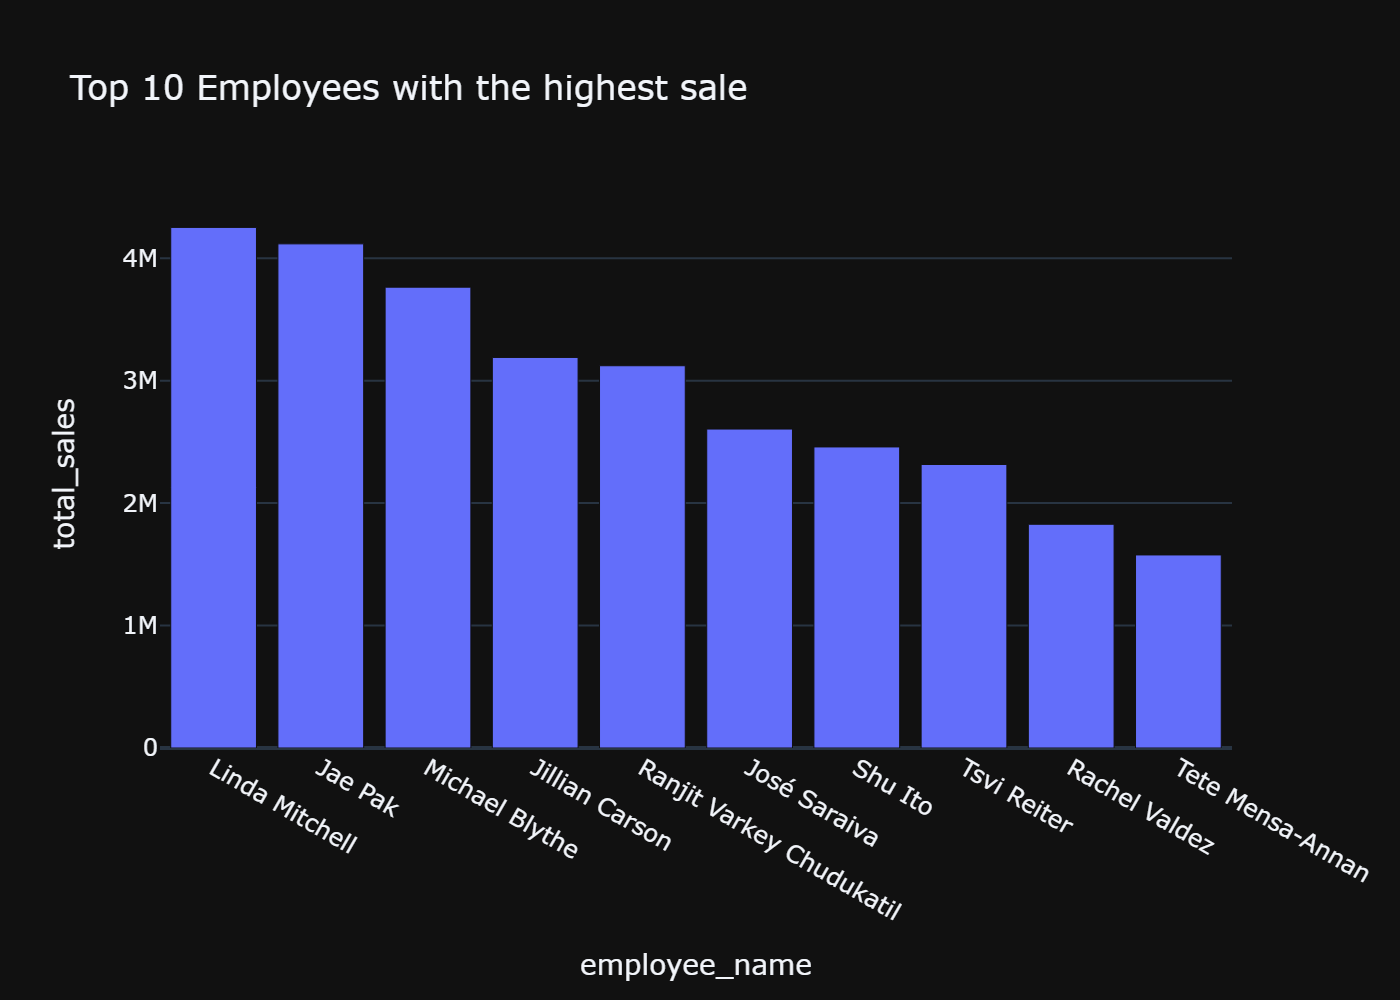


--------------------------------

[QUESTION]: Top 10 most sale products 

[QUERY]:
SELECT p.name AS product_name, SUM(sod.orderqty) AS total_sales
FROM sales.salesorderdetail sod
JOIN production.product p ON sod.productid = p.productid
GROUP BY p.name
ORDER BY total_sales DESC
LIMIT 10;


,product_name,total_sales
0,AWC Logo Cap,8311
1,Water Bottle - 30 oz.,6815
2,"Sport-100 Helmet, Blue",6743
3,"Long-Sleeve Logo Jersey, L",6592
4,"Sport-100 Helmet, Black",6532
5,"Sport-100 Helmet, Red",6266
6,"Classic Vest, S",4247
7,Patch Kit/8 Patches,3865
8,"Short-Sleeve Classic Jersey, XL",3864
9,"Long-Sleeve Logo Jersey, M",3636


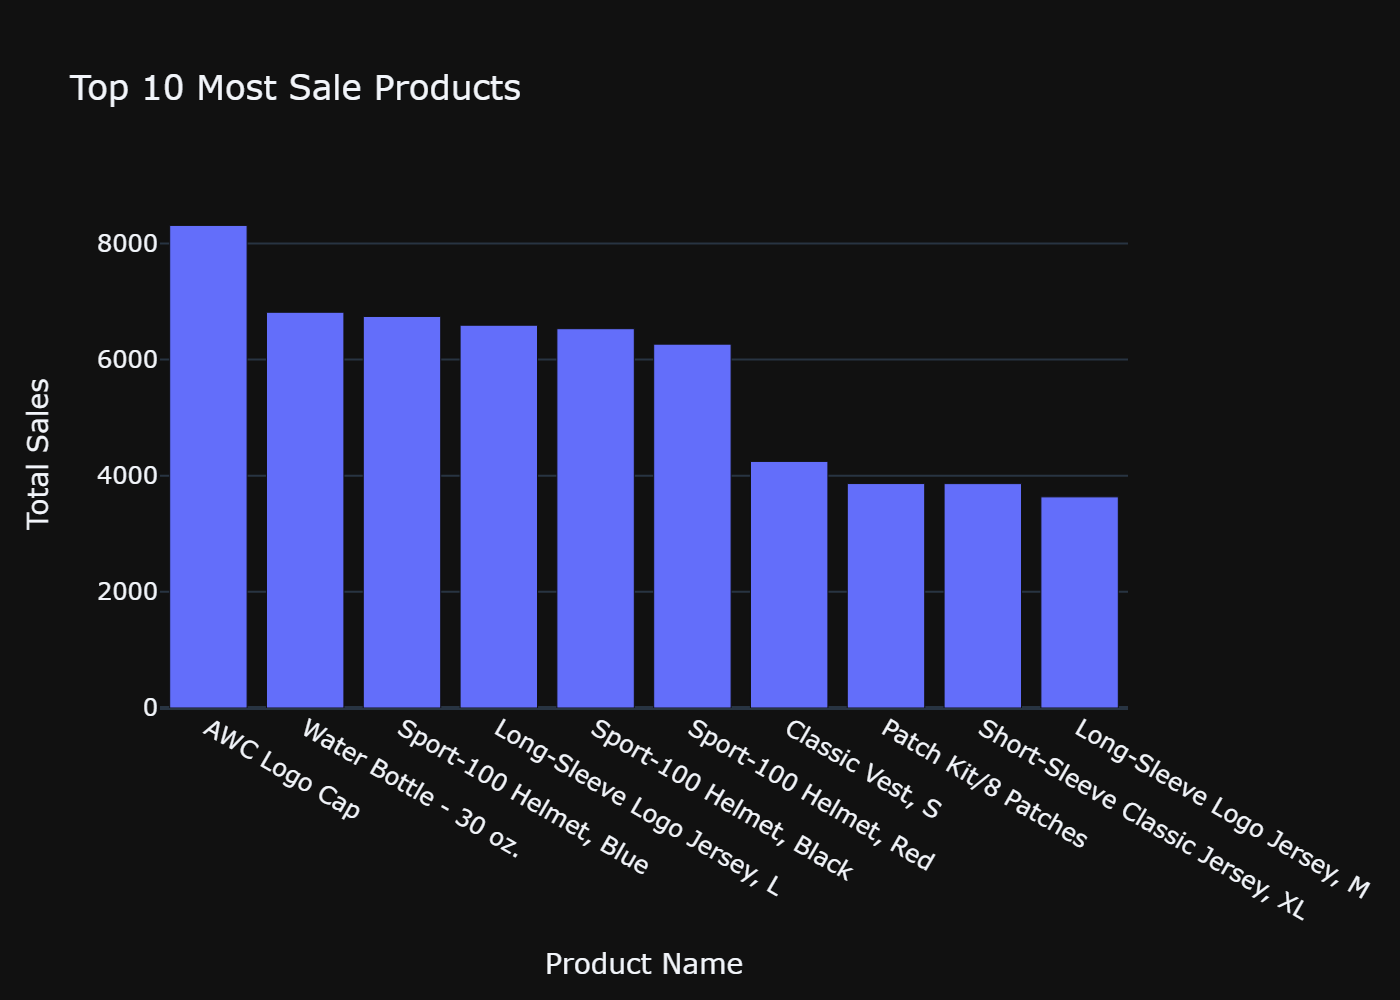


--------------------------------

[QUESTION]: Top 10 Employees with the highest sale 

[QUERY]:
SELECT p.firstname || ' ' || p.lastname AS employee_name, SUM(s.salesytd) AS total_sales
FROM sales.salesperson s
JOIN person.person p ON s.businessentityid = p.businessentityid
GROUP BY p.firstname, p.lastname
ORDER BY total_sales DESC
LIMIT 10;


,employee_name,total_sales
0,Linda Mitchell,4251368.5497
1,Jae Pak,4116871.2277
2,Michael Blythe,3763178.1787
3,Jillian Carson,3189418.3662
4,Ranjit Varkey Chudukatil,3121616.3202
5,José Saraiva,2604540.7172
6,Shu Ito,2458535.6169
7,Tsvi Reiter,2315185.611
8,Rachel Valdez,1827066.7118
9,Tete Mensa-Annan,1576562.1966


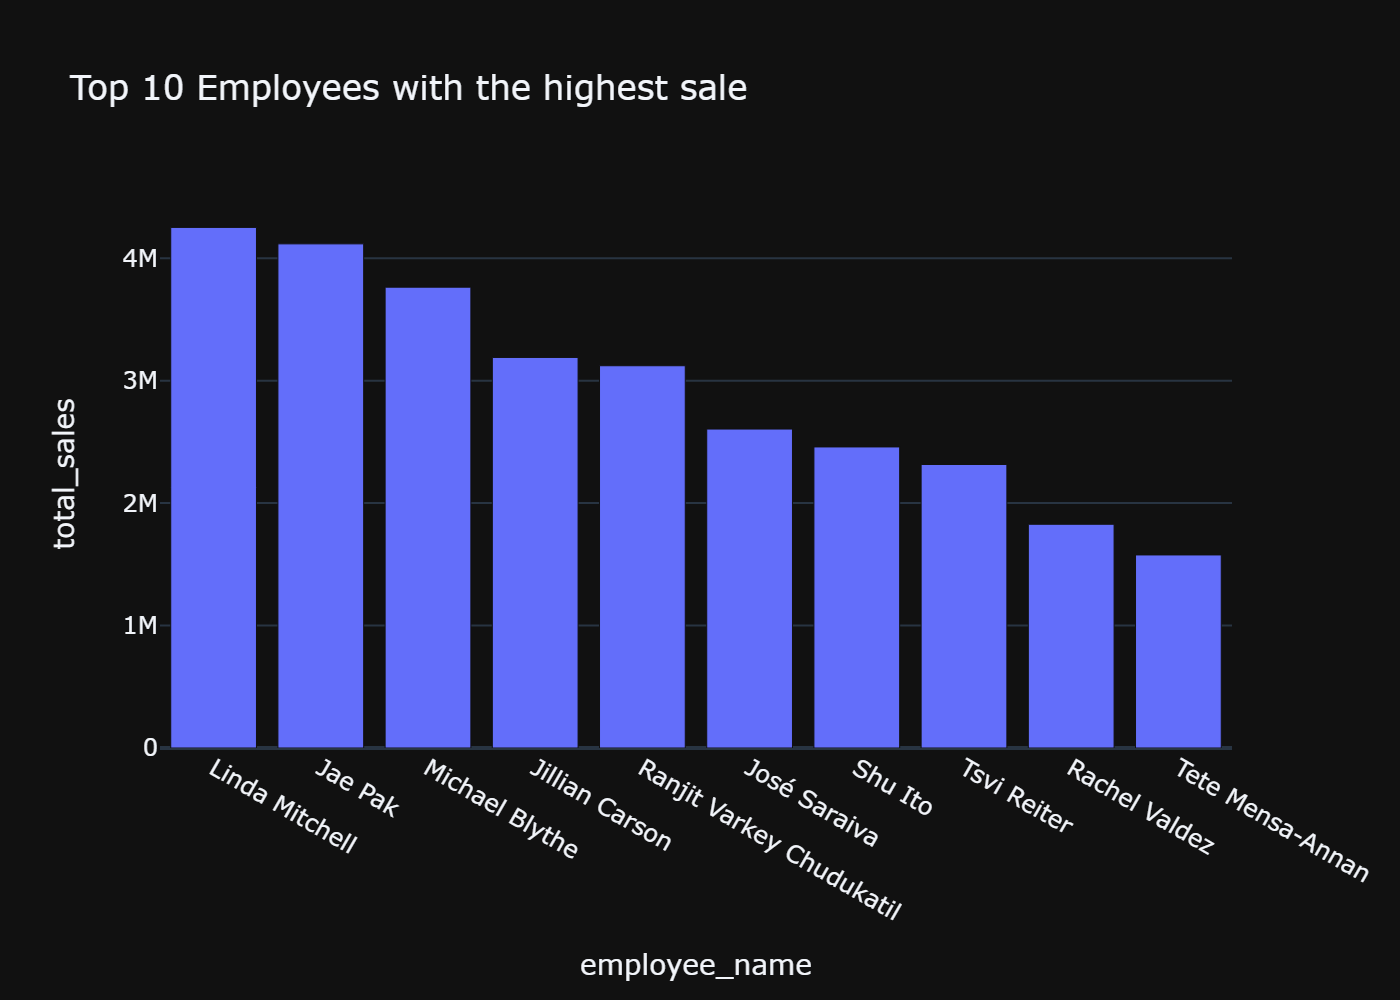

In [84]:
questions = [
    "What it the total amount of people by region?", # SUCCESS
    "Group the amount of people each business entity have", # SUCCESS
    "How much work orders are?", # SUCCESS
    "Which is the product most ordered?" # SUCCESS, but first missed error on postgres sintaxis, 
    "Give me the total amount of products by category", # SUCCESS,but first missed schema on join
    "What is the total amount from sales?", # SUCESS,but first missed schema and wrong tables
    "What is the total profit?", # Wrong, first missed schema and wrong tables and then succeed on choosing the correct schema and table but missed the column and the algebraic was wrong
    "Which is the product that most changed his cost over the past?", # WRONG, the result is not accurate but the table used is correct
    "How much product were sold for each category?" # SUCCED,but first the schema was correct but the table useded was not exist,
    "What is the total cost amount of all the products?", # SUCCEED, but first missed schema and wrong tables
    "What is the average sales per customers?", # SUCCEED, but first missed schema and wrong tables
    "What is the number of products in each category?", # SUCCEED, but first missed schema and wrong tables
    "Top 10 Customers with the highest purchase", # WRONG, first missed schema and wrong tables
    "Top 10 Employees with the highest sale", # SUCCEED, but first missed schema and wrong tables
    "Top 10 most sale products", # SUCCESS, but first missed schema and wrong tables
    "Top 10 Employees with the highest sale", # SUCCED, but first missed schema and wrong tables
    # "and what are their middlenames?",
    # "and where they live?",
    # "and what are their emails?",
    # "Rank customers by sales",
    ]
for i in range(len(questions)):
    try:
        print('\n--------------------------------\n')
        print(f'[QUESTION]: {questions[i]} \n')
        # query = vn.generate_sql(questions[i])
        print(f'[QUERY]:')
        sql_result = vn.ask(questions[i])
    except Exception as e:
        print(e.args)

